<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from error_analysis_funs import *

methods = ['qeep-cons', 'pencil']

phases = np.random.uniform(0, 2*np.pi, 3) #[3, 4.1]
#[4.77144,    2.82579877, 4.88021636, 0.41070768, 3.06350016]
num_phases = len(phases)

final_error = 1e-5
alpha = 2
gamma = 1
epsilons = [0.1]
eps0 = 0.09

cutoff = 1/ num_phases / 3

amplitudes = np.ones(num_phases)/num_phases

estimates = {}
costs = {}
for method in methods:
    estimates[method] = {}
    costs[method] = {}

for method in methods:
    for eps in epsilons:
        
        print(method, eps)
        e,c, error_flag  = multiorder_estimation(method,
                             phases, amplitudes,
                             eps, eps0, alpha, gamma,
                             final_error, cutoff)
        print(error_flag)
        estimates[method][eps] = e
        costs[method][eps] = c

qeep-cons 0.1


C:\Users\Repair\Documents\new_qpe_alg\qpe\sparse_qpe.py:110: UserWarning: New multiplier is between 1 and 2, this may be inefficient.
  warnings.warn('New multiplier is between 1 and 2, this '
C:\Users\Repair\Documents\new_qpe_alg\qpe\sparse_qpe.py:110: UserWarning: New multiplier is between 1 and 2, this may be inefficient.
  warnings.warn('New multiplier is between 1 and 2, this '
C:\Users\Repair\Documents\new_qpe_alg\qpe\sparse_qpe.py:110: UserWarning: New multiplier is between 1 and 2, this may be inefficient.
  warnings.warn('New multiplier is between 1 and 2, this '
C:\Users\Repair\Documents\new_qpe_alg\qpe\sparse_qpe.py:110: UserWarning: New multiplier is between 1 and 2, this may be inefficient.
  warnings.warn('New multiplier is between 1 and 2, this '
C:\Users\Repair\Documents\new_qpe_alg\qpe\sparse_qpe.py:110: UserWarning: New multiplier is between 1 and 2, this may be inefficient.
  warnings.warn('New multiplier is between 1 and 2, this '


('success', 10)
pencil 0.1
('success', 10)


<>:9: DeprecationWarning: invalid escape sequence \e
<ipython-input-2-3aff95c63445>:9: DeprecationWarning: invalid escape sequence \e
  plt.title(f'$\epsilon = {eps}$')


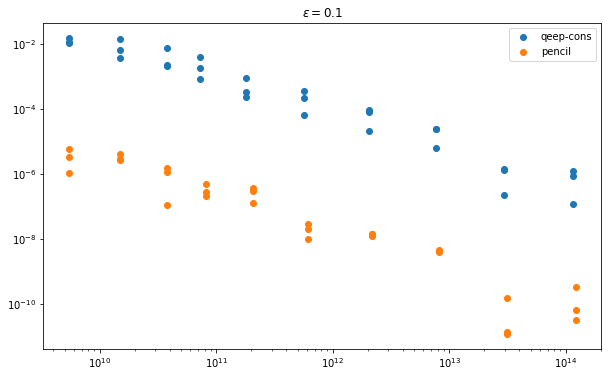

In [2]:
plt.figure(figsize = (10, 6))
for i,eps in enumerate(epsilons):
    plt.subplot(1,len(epsilons),i+1)
    for method in methods:
        estimation_errors = get_estimation_errors(estimates[method][eps], phases)
        plt.scatter([c for c_vec in costs[method][eps] for c in c_vec ], [e for e_vec in estimation_errors for e in e_vec ], label = method)
    plt.yscale('log')
    plt.xscale('log')
    plt.title(f'$\epsilon = {eps}$')
    plt.legend()
plt.show()

<>:8: DeprecationWarning: invalid escape sequence \e
<>:8: DeprecationWarning: invalid escape sequence \e
<ipython-input-3-b41ef9093306>:8: DeprecationWarning: invalid escape sequence \e
  plt.title(method+f', $\epsilon$ = {eps}')


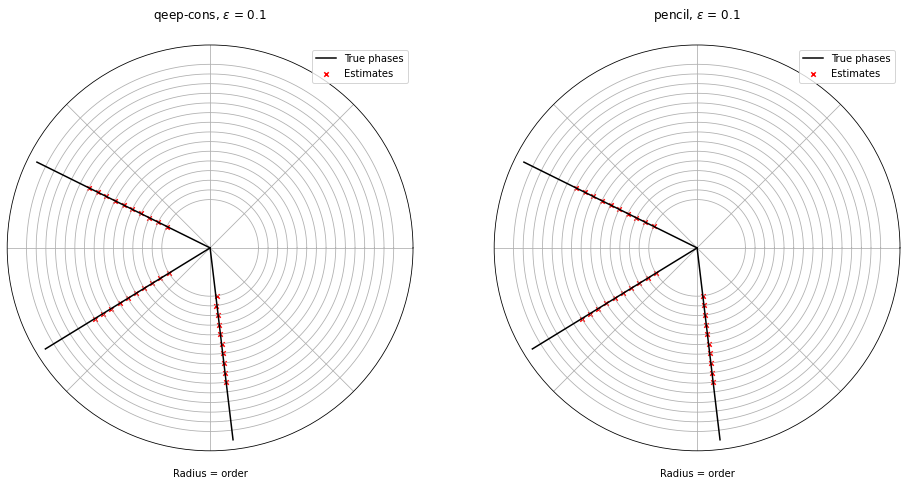

In [3]:
plt.figure(figsize = (16, 12))
i = 0
for eps in epsilons:
    for method in methods:
        i+=1
        plt.subplot(len(epsilons), len(methods), i, projection='polar')
        plot_phase_estimates(phases, estimates[method][eps], np.ceil(np.log2(2*eps/final_error)).astype('int'))
        plt.title(method+f', $\epsilon$ = {eps}')
plt.show()